In [323]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

from matplotlib.colors import ColorConverter
import glob

import warnings
warnings.filterwarnings("ignore", message="elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison")

In [248]:
#Inspects folder
suffix = "_type.csv"
list_of_basenames = list(map(lambda s:str.replace(s,suffix,""),glob.glob("*"+suffix)))
list_of_basenames


['2015-11-30_14-1_CB-CVX',
 '2015-11-30_15-17_CB-CVX',
 '2015-12-1_11-2_CB-CVX',
 '2015-12-1_13-46_CB-CVX',
 '2015-12-1_16-13_CB-CVX']

In [ ]:
# Defines x, y and t files
x_inputs = "_cb-value"
y_inputs = "_cvx-value"

type_inputs = "_type"

In [303]:
# Appends all x, y and t files together

x=y=t=pd.Series()

for bas_name in list_of_basenames:
    x=x.append(pd.read_csv(bas_name+x_inputs+".csv", header=None).unstack())
    y=y.append(pd.read_csv(bas_name+y_inputs+".csv", header=None).unstack())
    t = t.append(pd.read_csv(bas_name+type_inputs+".csv", header=None).unstack())

In [352]:
#Table of type codes to characteristics
dico =pd.read_csv("output_dico.csv",index_col="code") #removes # in color
#,converters={"color":lambda x:ColorConverter().to_rgb(x)}

In [366]:
dico.dropna()

,transition_type,fossil_order,color,value
code,,,,
herf_rg,Sequential transitions,Gas cheaper than coal,#1f78b4,40
simu_rg,Overlaping transitions,Gas cheaper than coal,#a6cee3,30
fast_rg,Starting with both,Gas cheaper than coal,#b2df8a,20
befo_rg,Starting with renewable,Gas cheaper than coal,#33a02c,10
no_gc,Using only renewable,,#af8dc3,0
herf_rc,Sequential transitions,Coal cheaper than gas,#e31a1c,-40
simu_rc,Overlaping transitions,Coal cheaper than gas,#fb9a99,-30
fast_rc,Starting with both,Coal cheaper than gas,#fdbf6f,-20
befo_rc,Starting with renewable,Coal cheaper than gas,#ff7f00,-10


# Plot

### plot params

In [337]:
font = {'family' : 'serif',
    'weight' : 'normal',
    'size'   : 15}

plt.rc('font', **font)

### actual plot 

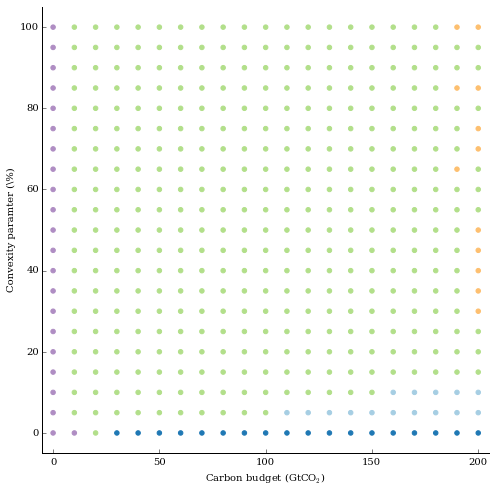

In [324]:
fig = plt.figure(figsize=(8,8))
ax=plt.gca()

ax.scatter(x,100*y,color=t.replace(dico["color"]),clip_on=False)

plt.xlabel("Carbon budget (GtCO$_2$)")
plt.ylabel("Convexity paramter (\%)")
plt.xlim(-5,205)
plt.ylim(-5,105)

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


plt.savefig("output.pdf")
plt.savefig("output.png")

### Legend

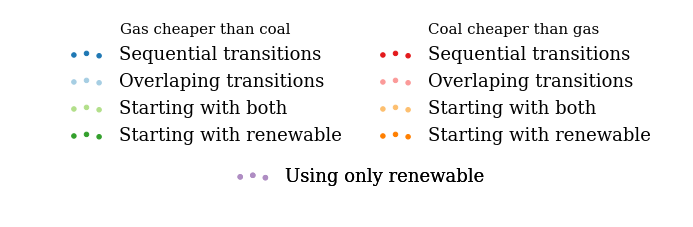

In [348]:
#Create custom artists
plt.figure(figsize=(11,3.5))
ax=plt.gca()

import matplotlib as mpl
mpl.rcParams['legend.numpoints'] = 1

position = {"Gas cheaper than coal":"upper left","Coal cheaper than gas":"upper right"," ":"lower center"}

for marg in ["Gas cheaper than coal","Coal cheaper than gas"," "]:
    
    d = dico.query("fossil_order=='"+marg+"'")
    simArtist =[]
    for i in d.index:
        simArtist.append(plt.scatter(0,0,color=d.ix[i,"color"]));

    #Create legend from custom artist/label lists
    the_legend = plt.legend(simArtist,d.transition_type.tolist(), 
                            numpoints=1,title=marg,loc= position[marg] ,
                           frameon=False)
    ax.add_artist(the_legend)
    plt.setp(the_legend.get_title(),fontsize=15)

    
plt.axis('off')
plt.ylim(0.001)

plt.savefig("transition_types_legend.pdf")


In [263]:
##### PDFCROP and pdf to png (latexscript and imagemagick script)
!pdfcrop transition_types_legend.pdf transition_types_legend.pdf
!convert transition_types_legend.pdf transition_types_legend.png 

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `transition_types_legend.pdf'.


In [313]:
#Series to dataframe 
df=pd.DataFrame([x.values,y.values,t.values],index=["x","y","t"]).T.pivot(index="y",columns="x",values="t").replace(dico["value"])
df.head()

x,0,10,20,30,40,50,60,70,80,90,...,110,120,130,140,150,160,170,180,190,200
y,,,,,,,,,,,,,,,,,,,,,
0.00,0,0,20,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40
0.05,0,20,20,20,20,20,20,20,20,20,...,30,30,30,30,30,30,30,30,30,30
0.10,0,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,30,30,30,30,30
0.15,0,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
0.20,0,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20


In [393]:
levels = [-50,-35,-25,-15,-5,5,15,25,35,50]
color_list = dico.dropna().sort_values(by="value").color.tolist()

In [394]:
dico.dropna().sort_values(by="value")

,transition_type,fossil_order,color,value
code,,,,
herf_rc,Sequential transitions,Coal cheaper than gas,#e31a1c,-40
simu_rc,Overlaping transitions,Coal cheaper than gas,#fb9a99,-30
fast_rc,Starting with both,Coal cheaper than gas,#fdbf6f,-20
befo_rc,Starting with renewable,Coal cheaper than gas,#ff7f00,-10
no_gc,Using only renewable,,#af8dc3,0
befo_rg,Starting with renewable,Gas cheaper than coal,#33a02c,10
fast_rg,Starting with both,Gas cheaper than coal,#b2df8a,20
simu_rg,Overlaping transitions,Gas cheaper than coal,#a6cee3,30
herf_rg,Sequential transitions,Gas cheaper than coal,#1f78b4,40


In [395]:
levels

[-50, -35, -25, -15, -5, 5, 15, 25, 35, 50]

In [396]:
color_list

['#e31a1c',
 '#fb9a99',
 '#fdbf6f',
 '#ff7f00',
 '#af8dc3',
 '#33a02c',
 '#b2df8a',
 '#a6cee3',
 '#1f78b4']

In [401]:
import scipy.ndimage
smooth_param=1e3
smoothed_data = scipy.ndimage.zoom(df.values, smooth_param)

MemoryError: 

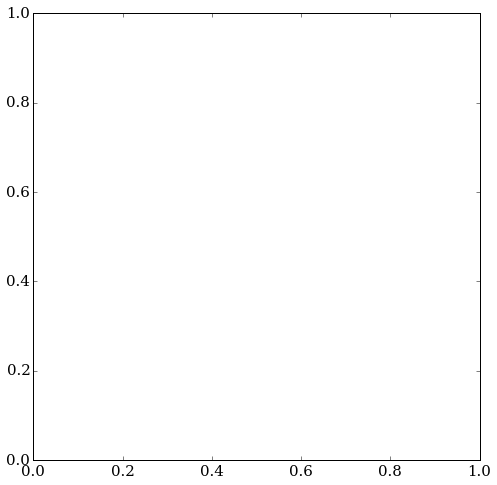

In [402]:

fig = plt.figure(figsize=(8,8))
ax=plt.gca()

ax.contourf(smoothed_data,levels, colors=color_list);
ax.contour(smoothed_data,levels, colors="black");
#plt.clabel(cs, inline=1)

plt.savefig("output_contour.png")

['#e31a1c',
 '#fb9a99',
 '#fdbf6f',
 '#ff7f00',
 '#af8dc3',
 '#33a02c',
 '#b2df8a',
 '#a6cee3',
 '#1f78b4']

In [ ]:
 colors=('r', 'g', 'b')
    
    